# Imports

In [1]:
import os
import boto3
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import json
from botocore import UNSIGNED
from botocore.config import Config


# Load data

In [2]:
# initialise the S3 client
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

# local folder to save the data
dataset_folder = '/Users/renatoboemer/code/developer/aot-object-tracking-aws/raw_data/airborne_data'

# list the bucket contents
bucket_name = 'airborne-obj-detection-challenge-training'
prefix = 'part1/'
result = s3.list_objects_v2(Bucket=bucket_name)

# initialise helper functions
def download_annotations(bucket, key, local_path):
    s3.download_file(bucket, key, local_path)

## Annotations: Groundtruth file

In [8]:
download_annotations(bucket_name, prefix + 'ImageSets/groundtruth.csv', os.path.join(dataset_folder, 'groundtruth.csv'))

In [3]:
gt_data = pd.read_csv(os.path.join(dataset_folder, 'groundtruth.csv'), index_col=0)
gt_data.head(2)

,time,flight_id,img_name,frame,id,range_distance_m,is_above_horizon,size_width,size_height,gt_left,gt_top,gt_right,gt_bottom
0,1566556045879430639,673f29c3e4b4428fa26bc55d812d45d9,1566556045879430639673f29c3e4b4428fa26bc55d812...,3,NaN,NaN,NaN,2448,2048,NaN,NaN,NaN,NaN
1,1566556046008821070,673f29c3e4b4428fa26bc55d812d45d9,1566556046008821070673f29c3e4b4428fa26bc55d812...,4,NaN,NaN,NaN,2448,2048,NaN,NaN,NaN,NaN


In [4]:
gt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1808316 entries, 0 to 1808315
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              int64  
 1   flight_id         object 
 2   img_name          object 
 3   frame             int64  
 4   id                object 
 5   range_distance_m  float64
 6   is_above_horizon  float64
 7   size_width        int64  
 8   size_height       int64  
 9   gt_left           float64
 10  gt_top            float64
 11  gt_right          float64
 12  gt_bottom         float64
dtypes: float64(6), int64(4), object(3)
memory usage: 193.1+ MB


## Annotations: Valid encounters file

In [ ]:
# download_annotations(bucket_name, prefix + 'ImageSets/valid_encounters_maxRange700_maxGap3_minEncLen30.csv', os.path.join(dataset_folder, 'valid_encounters.csv'))
# print("Annotations downloaded successfully.")

In [5]:
ve_data = pd.read_csv(os.path.join(dataset_folder, 'valid_encounters.csv'), index_col=0)
ve_data.head(2)

,encounter_id,flight_id,framemin,framemax,framecount,enc_len_with_gaps,is_above_horizon,min_enc_range,max_enc_range,median_enc_range,mean_enc_range
0,0.0,0001ba865c8e410e88609541b8f55ffc,229,325,97,97,-1.0,188.553218,698.099154,437.850254,439.418240
1,1.0,0011f3f114a741b5b02326c9e96e597a,682,763,82,82,1.0,112.957622,694.762230,402.218648,402.651121


In [7]:
ve_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 878
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   encounter_id       879 non-null    float64
 1   flight_id          879 non-null    object 
 2   framemin           879 non-null    int64  
 3   framemax           879 non-null    int64  
 4   framecount         879 non-null    int64  
 5   enc_len_with_gaps  879 non-null    int64  
 6   is_above_horizon   879 non-null    float64
 7   min_enc_range      879 non-null    float64
 8   max_enc_range      879 non-null    float64
 9   median_enc_range   879 non-null    float64
 10  mean_enc_range     879 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 82.4+ KB


## Save images

In [ ]:
# # create a directory to dowmload images
# os.makedirs('raw_data/airborne_images', exist_ok=True)

# bucket_name = 'airborne-obj-detection-challenge-training'
# flight_id = '0001ba865c8e410e88609541b8f55ffc'
# sequence_prefix = f'part1/Images/{flight_id}/'

# # variables for pagination
# image_count = 0
# continuation_token = None

# # loop to handle pagination
# while True:
#     if continuation_token:
#         result = s3.list_objects_v2(Bucket=bucket_name, Prefix=sequence_prefix, ContinuationToken=continuation_token)
#     else:
#         result = s3.list_objects_v2(Bucket=bucket_name, Prefix=sequence_prefix)

#     # check if any objects were found
#     if 'Contents' in result:
#         for content in result['Contents']:
#             file_key = content['Key']

#             # download only PNG files
#             if file_key.endswith('.png'):
#                 local_filename = os.path.join('dataset', os.path.basename(file_key))
#                 s3.download_file(bucket_name, file_key, local_filename)
#                 image_count += 1

#     # check if there are more objects to retrieve (pagination)
#     if result.get('IsTruncated'):
#         continuation_token = result['NextContinuationToken']
#     else:
#         break

# print(f'Downloaded {image_count} images for flight ID {flight_id}.')

# Check data

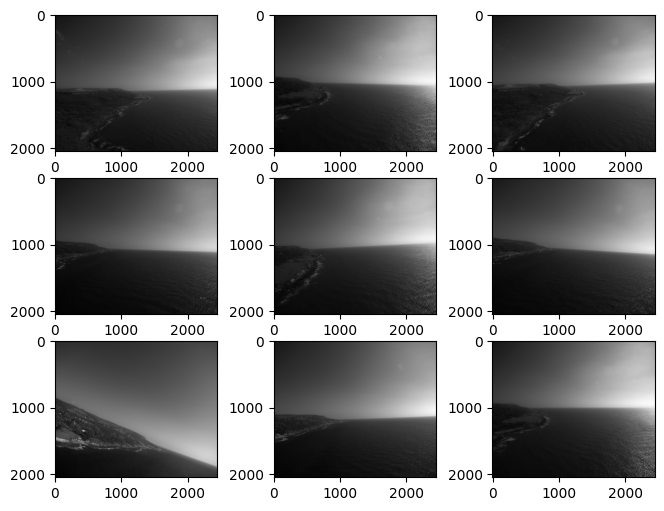

In [8]:
# get the directory of the current script
script_dir = os.getcwd()

# construct relative path to the airborne_images folder
image_folder = os.path.join(script_dir, '..', 'raw_data', 'airborne_images')

# list the images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

fig = plt.figure(figsize=(8,6))

for i in range(1, 10):
    img = cv2.imread(os.path.join(image_folder, image_files[i]))
    fig.add_subplot(3, 3, i)
    plt.imshow(img, cmap='gray')

plt.show()

In [9]:
img_test_1 = cv2.imread(os.path.join(image_folder, image_files[0]))

height, width, _ = img_test_1.shape

print(f"Width: {width} pixels, Height: {height} pixels")

Width: 2448 pixels, Height: 2048 pixels


# Process data

In [10]:
script_dir = os.getcwd()
dataset_dir = os.path.join(script_dir, '..', 'raw_data', 'airborne_images')
resized_dir = os.path.join(script_dir, '..', 'raw_data', 'airborne_images_resized')

In [ ]:
# # desired shorter side length
# short_side_length = 800

# # create output directory if it doesn't exist
# if not os.path.exists(resized_dir):
#     os.makedirs(resized_dir, exist_ok=True)

# # get list of image files
# flight_images = os.listdir(dataset_dir)
# resized_count = 0

# # resize images
# for image_file in flight_images:
#     if image_file.endswith('.png'):
#         # load image
#         image_path = os.path.join(dataset_dir, image_file)
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#         if image is None:
#             print(f'Error loading image: {image_file}')
#             continue

#         # get current dimensions
#         h, w = image.shape[:2]

#         # calculate the new size maintaining aspect ratio
#         if w > h:
#             new_w = short_side_length
#             new_h = int((h / w) * short_side_length)
#         else:
#             new_h = short_side_length
#             new_w = int((w / h) * short_side_length)

#         # resize image
#         resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

#         # save resized image
#         output_path = os.path.join(resized_dir, image_file)
#         cv2.imwrite(output_path, resized_image)
#         resized_count += 1

# print(f"Resized {resized_count} images and saved to: {resized_dir}")


In [11]:
img_resized_test_1 = cv2.imread(os.path.join(resized_dir, image_files[0]))

height, width, _ = img_test_1.shape

print(f"Width: {width} pixels, Height: {height} pixels")

Width: 2448 pixels, Height: 2048 pixels


# Select a flight for testing

In [ ]:
flight_id = '0001ba865c8e410e88609541b8f55ffc'
gt_df = gt_data[gt_data['flight_id'] == flight_id]
gt_df.info()